In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
data = pd.read_csv('../DATA/GlaucomaM.csv')
data.head()

,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal


In [14]:
data['Class'].value_counts()

Class
normal      98
glaucoma    98
Name: count, dtype: int64

In [15]:
data['Class'] = data['Class'].map({'glaucoma': 1, 'normal': 0})

In [16]:
data.isna().sum()

ag       0
at       0
as       0
an       0
ai       0
        ..
rnf      0
mdic     0
emd      0
mv       0
Class    0
Length: 63, dtype: int64

In [17]:
data.describe()

,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.00000
mean,2.606531,0.458980,0.651781,0.835929,0.659995,1.874138,0.406372,0.486403,0.501214,0.480097,...,-0.004658,-0.039806,-0.147204,-0.036510,0.904985,0.182383,0.231270,0.308903,0.033541,0.50000
std,0.659789,0.127013,0.158462,0.222166,0.161065,0.721218,0.125941,0.184486,0.286181,0.173977,...,0.128062,0.150077,0.134205,0.136423,0.112356,0.094080,0.123882,0.128246,0.021850,0.50128
min,1.312000,0.201000,0.345000,0.397000,0.369000,0.415000,0.137000,0.017000,0.008000,0.098000,...,-0.291000,-0.449000,-0.510000,-0.405000,0.647000,-0.297000,0.012000,0.047000,0.000000,0.00000
25%,2.139250,0.370750,0.538500,0.681000,0.550500,1.309250,0.315750,0.380750,0.280500,0.372500,...,-0.101000,-0.135250,-0.231000,-0.127500,0.826000,0.119750,0.144000,0.230500,0.021000,0.00000
50%,2.533000,0.444500,0.630500,0.808500,0.632000,1.843500,0.402500,0.468500,0.503500,0.484000,...,-0.018500,-0.031500,-0.146500,-0.036000,0.899500,0.182000,0.227000,0.298000,0.028000,0.50000
75%,2.943500,0.528000,0.738250,0.952000,0.749750,2.317000,0.483250,0.605500,0.689500,0.594750,...,0.087750,0.068000,-0.056250,0.049500,0.968500,0.237000,0.299250,0.379250,0.038250,1.00000
max,5.444000,0.967000,1.340000,1.765000,1.373000,4.125000,0.848000,1.225000,1.568000,0.961000,...,0.366000,0.358000,0.245000,0.418000,1.317000,0.451000,0.663000,0.743000,0.183000,1.00000


In [18]:
x, y = data.iloc[:, :-1], data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 123)

In [19]:
rf = RandomForestRegressor(n_estimators = 200, random_state=123)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=123)

In [20]:
rf_pred_tr = rf.predict(x_train)
rf_pred_ts = rf.predict(x_test)
rmse_train = mean_squared_error(y_train, rf_pred_tr)**(1/2)
rmse_test = mean_squared_error(y_test, rf_pred_ts)**(1/2)
print("Train set RMSE: %f " % (rmse_train))
print("Test set RMSE: %f " % (rmse_test))

Train set RMSE: 0.135382 
Test set RMSE: 0.369781 


In [21]:
rf_params = {'max_depth': [6,7,8],'min_samples_leaf':[0.08,0.1,0.12], 'max_features':[0.5,0.7,0.9]}

from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv=5,
                     scoring='neg_mean_squared_error',
                     verbose=2)

grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   1.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   1.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.9s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.8s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.7s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.6s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.6s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.5s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.7s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.7s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.12; total time=   0.7s
[CV] END max_depth=6, max_features=0.5, m

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200,
                                             random_state=123),
             param_grid={'max_depth': [6, 7, 8],
                         'max_features': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [0.08, 0.1, 0.12]},
             scoring='neg_mean_squared_error', verbose=2)

In [22]:
best_param = grid_rf.best_params_
print('Best parameters found for rf: ', best_param)
print('Lowerst RMSE found for rf: ', np.sqrt(np.sqrt(np.abs(grid_rf.best_score_))))

Best parameters found for rf:  {'max_depth': 6, 'max_features': 0.7, 'min_samples_leaf': 0.12}
Lowerst RMSE found for rf:  0.6018365609626789


In [23]:
from sklearn.model_selection import GridSearchCV
grid_rf = RandomForestRegressor(n_estimators = 200, random_state=123, **best_param, verbose=1)

grid_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


RandomForestRegressor(max_depth=6, max_features=0.7, min_samples_leaf=0.12,
                      n_estimators=200, random_state=123, verbose=1)

In [24]:
# predictions
rf_pred_tr = grid_rf.predict(x_train)
rf_pred_ts = grid_rf.predict(x_test)
rmse_train = mean_squared_error(y_train, rf_pred_tr)**(1/2)
rmse_test = mean_squared_error(y_test, rf_pred_ts)**(1/2)
print("Train set RMSE: %f " % (rmse_train))
print("Test set RMSE: %f " % (rmse_test))

Train set RMSE: 0.284251 
Test set RMSE: 0.373196 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


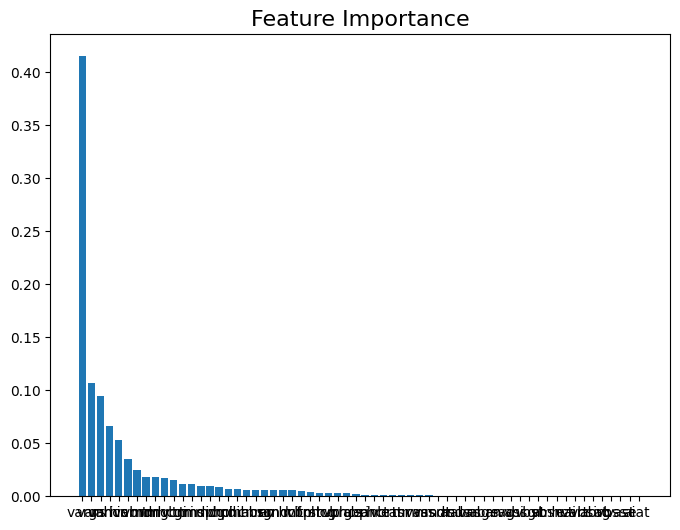

In [25]:
plt.figure(figsize=(8,6))
importances = grid_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(x_train.columns[indices], importances[indices]) 
plt.title('Feature Importance', fontsize=16);

In [26]:
import xgboost as xgb

# Create DMatrix for Cross Validation: an optimized & compressed matrix used to store the datasets optimally in xgboost
# It is very recommendable 
data_dmatrix = xgb.DMatrix(data=x, label=y)

xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 20)
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
preds = xg_reg.predict(x_train)
preds_test = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_train, preds))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("Attempt 1 Train RMSE: %f" % (rmse))
print("Attmept 1 Test RMSE: %f" % (rmse_test))

Attempt 1 Train RMSE: 0.004182
Attmept 1 Test RMSE: 0.387054


In [28]:
params = {'objective':'reg:squarederror', 'colsample_bytree':0.3, 'learning_rate':0.1, 'max_depth':5,
         'alpha':10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold = 3, num_boost_round=200, early_stopping_rounds=5,
                   metrics="rmse", as_pandas=True, seed=123)

# num_boost_round: rounds. A high value might lead to overfitting
# early_stopping_rounds: if the evaluation metric does not improve in this number of consecutive rounds, training stops. Risk of overfitting if empty
# as_pandas=True: predictions will be returned as a dataframe, instead of a dictionary
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.481198,0.001585,0.490030,0.002133
1,0.464857,0.002378,0.476249,0.002210
2,0.453755,0.002528,0.469082,0.002136
3,0.441174,0.003115,0.460446,0.002236
4,0.430040,0.003936,0.452003,0.001911
5,0.420440,0.006009,0.446332,0.001953
6,0.409825,0.006791,0.437985,0.002070
7,0.400542,0.007364,0.431715,0.001867
8,0.393814,0.007527,0.427816,0.002543
9,0.385527,0.007714,0.421884,0.003111


In [29]:
print((cv_results['test-rmse-mean']).tail(5))

32    0.387566
33    0.387566
34    0.387566
35    0.387566
36    0.387311
Name: test-rmse-mean, dtype: float64


In [30]:
gbm_param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'subsample':[0.3,0.4,0.5]} #subsample controls % of data used
gbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_mse.fit(x, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.3s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.5s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.5s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.4s
[CV] END ..................learning_rate=0.01, subsample=0.5; total time=   0.5s
[CV] END ..................learning_rate=0.01, su

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error', verbose=2)

In [35]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowest RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning_rate': 0.1, 'subsample': 0.5}
Lowest RMSE found:  0.6356261089799832


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

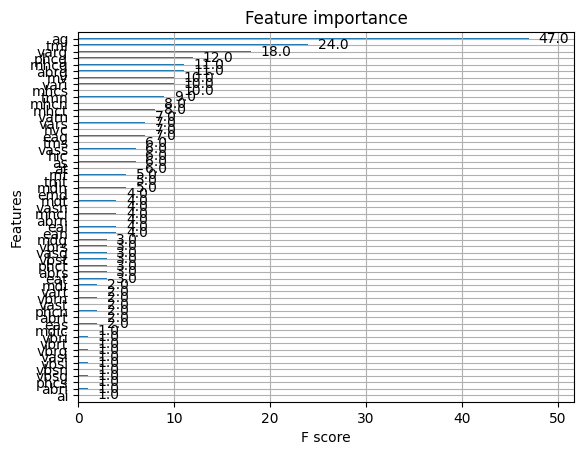

In [36]:
xgb.plot_importance(xg_reg, importance_type="weight")

# weight: number of times the variable has been used
# gain: average gain whenever variable is used
# cover: how many samples were affected by using each variable